## SAMARTH MOTKA
## 202311023
## 22/1/24

---

## AML-Assignment-2

---

#Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: C₁ is the first coin flipped; Crand is a coin you choose at random; Cmin is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let V1, Vrand and min be the fraction of heads you obtain for the respective three coins.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Generating simulation for flipping coins

In [2]:
sim = []
outcomes = ['H','T']
for i in range(1000):
  flip=[]
  for j in range(10):
    flip.append(random.choice(outcomes))
  sim.append(flip)

cot=[]
for i in sim:
  cot.append(i.count('H'))

In [3]:
  c1 = 0
  crand = random.randint(0,999)
  cmin = cot.index(min(cot))

  v1 = cot[0]
  vrand = cot[crand]
  vmin = cot[cmin]

  v=[]
  v.append(v1)
  v.append(vrand)
  v.append(vmin)

Finding the index with least H outcomes

In [4]:
cot = []
for i in sim:
  cot.append(i.count('H'))



In [5]:
c1 = 0
crand = random.randint(0,999)
cmin = cot.index(min(cot))


In [6]:
v1 = cot[0]
vrand = cot[crand]
vmin = cot[cmin]

In [7]:
print(c1,crand,cmin)

0 679 65


Printing the values of V1,Vrand Vmin

In [8]:
print(f'V1 : {v1}, Vrand : {vrand}, Vmin : {vmin}')

V1 : 4, Vrand : 2, Vmin : 1


Doing it for 100000 Iterations

In [9]:
n_flips = 10
n_trials = 100000
n_coins = 1000
p = 0.5
outcome = np.random.binomial(n_flips, p, (n_trials, n_coins))/n_flips

In [10]:
def plot_dist(x, bins=10):
    sns.distplot(
        x,
        hist=True,
        bins=bins,
        hist_kws={"align": "left", "normed":True},
        kde_kws={"bw": 1,"shade": True}
    );

V1 Mean

In [11]:
v_1 = outcome[:, 0]
v_1
np.mean(v_1)

0.5008579999999999

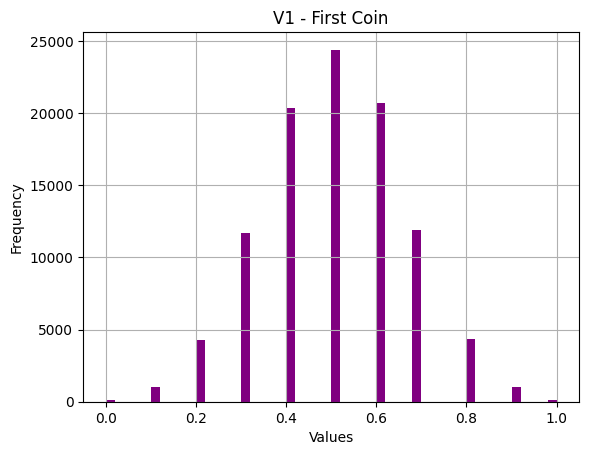

In [12]:
plt.hist(v_1, bins=50, color='purple')
plt.title('V1 - First Coin')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2.Vmin

In [13]:
v_min = outcome.min(axis=1)
np.mean(v_min)

0.037639

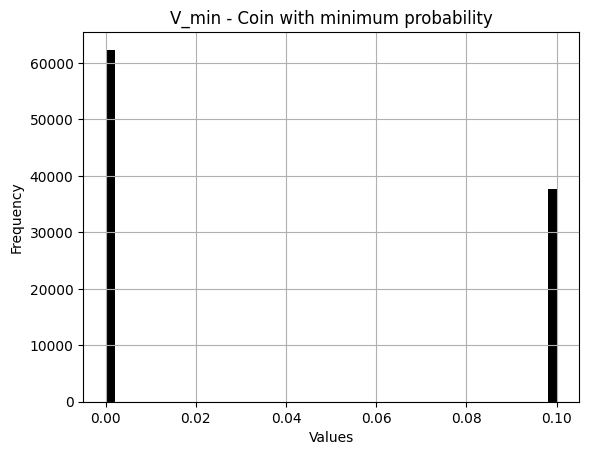

In [14]:
plt.hist(v_min, bins=50, color='black')
plt.title('V_min - Coin with minimum probability')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Vrand

In [15]:
v_rand = np.apply_along_axis(np.random.choice, 1, outcome)
np.mean(v_rand)/10

0.04998309999999999

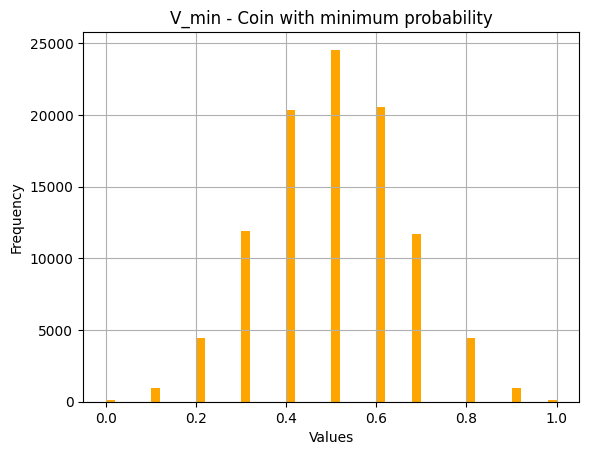

In [16]:
plt.hist(v_rand, bins=50, color='orange')
plt.title('V_min - Coin with minimum probability')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

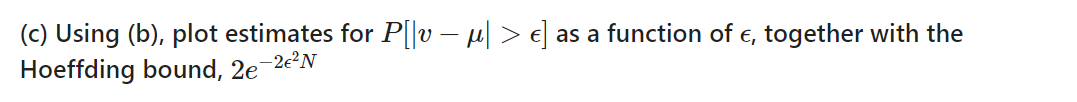

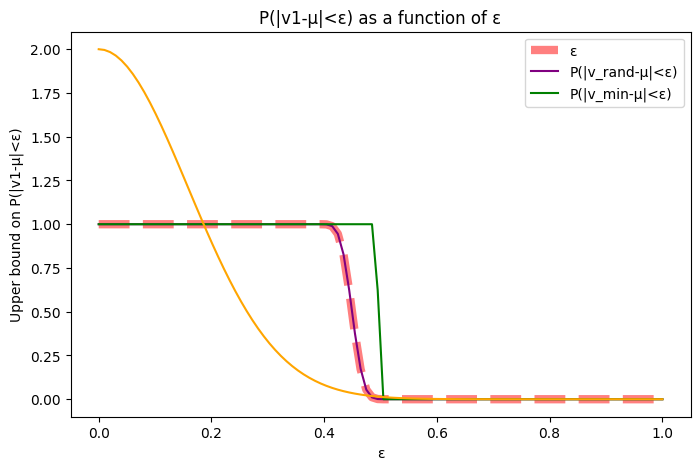

In [19]:
def hoeffding(epsilon, N=n_flips):
    return 2 * np.exp(-2 * (epsilon**2) * N)

def p_big_error(v, mu, epsilon):
    return (np.abs(v - mu)/n_flips > epsilon).mean()

epsilons = np.linspace(0,10,100)/n_flips

c1_errs = [p_big_error(v_1, 5, e) for e in epsilons]
c_rand_errs = [p_big_error(v_rand, 5, e) for e in epsilons]
c_min_errs = [p_big_error(v_min, 5, e) for e in epsilons]

plt.figure(figsize=(8,5));
plt.plot(epsilons, c1_errs, linewidth=6, linestyle= "--",color='red', alpha=0.5);
plt.plot(epsilons, c_rand_errs,color='purple');
plt.plot(epsilons, c_min_errs,color='green');
plt.plot(epsilons, np.apply_along_axis(hoeffding, 0, epsilons),color='orange');
plt.legend(["ε", "P(|v_rand-μ|<ε)", "P(|v_min-μ|<ε)"]);
# plt.despine();
plt.xlabel("ε");
plt.ylabel("Upper bound on P(|v1-μ|<ε)")
plt.title("P(|v1-μ|<ε) as a function of ε");

(d) Which coins obey the Hoeffding bound, and which ones do not? Ex- plain why.

In the realm of predicting coin toss outcomes using historical data, three prediction methods are considered: random guessing (v_rand), consistently choosing the initial outcome (v_first), and selecting the prediction with the highest historical accuracy (v_min).

When applying the Hoeffding bound, it becomes evident that v_rand and v_first conform to a specific rule, suggesting a certain level of reliability in their predictions according to the Hoeffding inequality. However, v_min deviates from this rule. The discrepancy can be attributed to the fact that v_min is tailored to the data, specifically chosen based on optimal performance across a substantial set of samples.

Essentially, while v_rand and v_first adhere to the principles of the Hoeffding bound, the reliance of v_min on a customized selection process diminishes its trustworthiness in line with the expectations set by the Hoeffding inequality.